#  The Spark Foundation - GRIP Program

# Data Science and Business Analytics

# Intern : Giridharan S

# Task 7 - Stock Market Prediction using Numerical and Textual Analysis

# (i) Stock Market Prediction using Textual Analysis

Our task is to predict whether the stock price will increase or decrease based on the financial news

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Importing the dataset from a github account.

In [2]:
url='https://raw.githubusercontent.com/krishnaik06/Stock-Sentiment-Analysis/master/Data.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')
df.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


In [3]:
df.tail(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
4099,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
4100,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


### Splitting the dataset into training and testing dataset

In [4]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

### Data-preprocessing Techniques

- replacing the special characters with ' ' (empty string)
- changing the column names as index for easy access

In [5]:
data = train.iloc[:,2:27]
data.replace('[^a-zA-Z]',' ',regex=True, inplace=True)

l = [i for i in range(25)]
new_index = [str(i) for i in l]
data.columns = new_index
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


Changing all the character to lower case for uniformity

In [6]:
for index in new_index:
    data[index] = data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


### Combining all 25 headlines in a row to form a paragraph and appending it to a list called headlines

In [7]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [8]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

### CountVectorizer is a technique used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [10]:
countvector = CountVectorizer(ngram_range=(2,2))
train_dataset = countvector.fit_transform(headlines)

### Model creation and Training

In [11]:
randomclassifier = RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(train_dataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

### Preprocessing the test data before prediction

In [12]:
test_transform = []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [13]:
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [14]:
predictions[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

### Evaluating our model using confusion matrix and accuracy score

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score

matrix = confusion_matrix(test['Label'],predictions)
print(matrix)
accuracy = accuracy_score(test['Label'],predictions)
print('The accuracy score :',accuracy)

[[141  45]
 [  6 186]]
The accuracy score : 0.8650793650793651


In [16]:
def Predict(test_news):
    test_news = test_news.lower()
    test_data = countvector.transform([test_news])
    if(randomclassifier.predict(test_data)[0] == 1):
        print('Stock price will increase !!!')
    else :
        print('Stock price will decrease !!!')

In [17]:
Predict('HDFC to off-load 0.62% stake in general insurance subsidiary')

Stock price will increase !!!


# (ii) Stock Price Prediction using Numerical Analysis

- Our task is to predict the approx stock price based on the historical numerical data
- We are going to predict TATAMOTORS's stock price for next 30 days based on thier past 5 years data

### Importing necessary libraries

In [27]:
import math
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

### Importing the historical data of TATMOTORS

In [151]:
df1 = pdr.DataReader('TATAMOTORS.NS', data_source = 'yahoo', start = '2015-01-01', end = '2021-05-11')
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,494.149750,487.026154,489.252289,493.160370,944551.0,492.960724
2015-01-02,511.909271,491.973083,491.973083,506.368683,4193093.0,506.163696
2015-01-05,520.417969,501.322815,504.686737,518.241333,6758676.0,518.031555
2015-01-06,508.891632,493.951874,508.891632,496.079071,7979598.0,495.878235
2015-01-07,495.089661,484.008514,489.746979,488.609192,9232656.0,488.411377
...,...,...,...,...,...,...
2021-05-05,293.899994,288.500000,293.500000,291.500000,29350536.0,291.500000
2021-05-06,302.000000,290.299988,291.500000,301.250000,45032502.0,301.250000
2021-05-07,305.950012,300.500000,303.000000,302.750000,41591323.0,302.750000


### Filtering the close price from the dataset which we are going to predict

In [152]:
df2 = df1.reset_index()['Close']
df2

0       493.160370
1       506.368683
2       518.241333
3       496.079071
4       488.609192
           ...    
1560    291.500000
1561    301.250000
1562    302.750000
1563    314.850006
1564    315.549988
Name: Close, Length: 1565, dtype: float64

### Plotting the close price

Text(0.5, 1.0, 'Close Price in last 5 years')

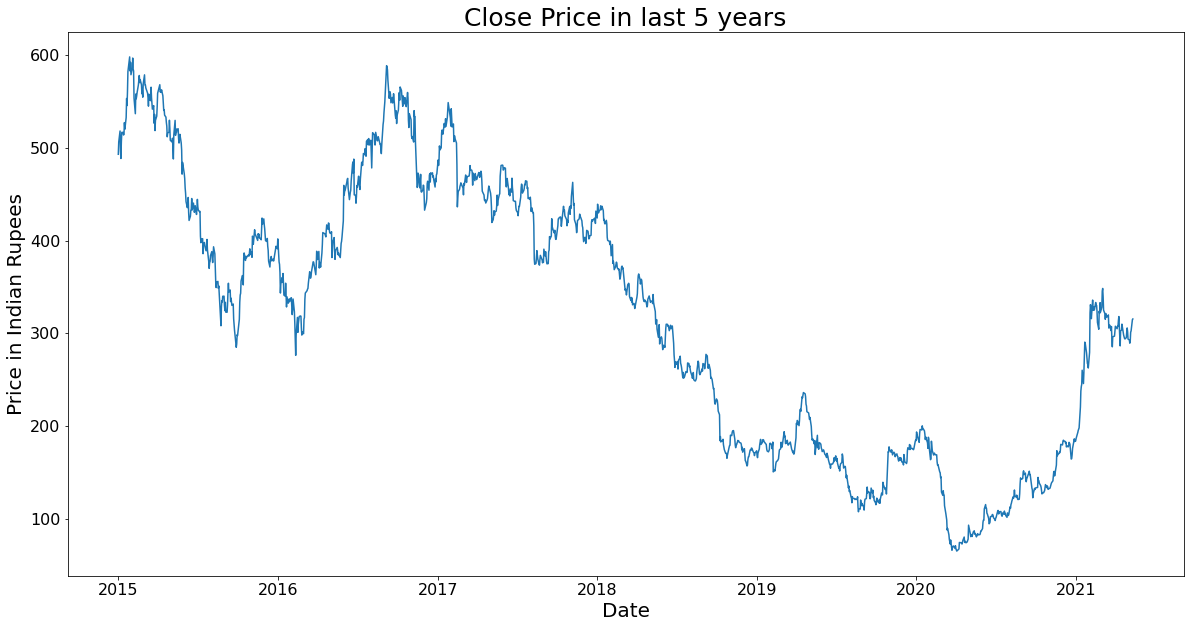

In [153]:
plt.plot(df1['Close'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price in Indian Rupees', fontsize = 20)
plt.title('Close Price in last 5 years', fontsize = 25)

### Scaling the data inbetween the range of 0 and 1

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [155]:
df2

array([[0.80298939],
       [0.82777817],
       [0.85006023],
       ...,
       [0.44563564],
       [0.4683444 ],
       [0.46965809]])

### Splitting the data into train and test data

In [156]:
training_size=int(len(df2)*0.7)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [157]:
training_size,test_size

(1095, 470)

In [158]:
train_data

array([[0.80298939],
       [0.82777817],
       [0.85006023],
       ...,
       [0.19790388],
       [0.19471341],
       [0.19161674]])

### Creating the independent features using time step
### Here time step is set as 100, therefore close price of 100 days is used to predict the close price of 101st day.
- (F 1, F 2, F 3 .... F 99, F 100) ---> o/p (101)
- (F 2, F 3, F 4 .... F 100, F 101) ---> o/p (102)

### Features will be the x_train data and O/P will be the y_train. Same as in test data

In [159]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [160]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [161]:
print(X_train.shape)
print(y_train.shape)

(994, 100)
(994,)


In [162]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Creating a Recurrent Neural Network (RNN) called LSTM

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [164]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

### The model was trained and validated using train and test dataset respectively

In [165]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 15s 364ms/step - loss: 0.1278 - val_loss: 0.0059
Epoch 2/100
16/16 [==============================] - 4s 236ms/step - loss: 0.0123 - val_loss: 0.0055
Epoch 3/100
16/16 [==============================] - 4s 241ms/step - loss: 0.0064 - val_loss: 0.0038
Epoch 4/100
16/16 [==============================] - 4s 245ms/step - loss: 0.0037 - val_loss: 0.0022
Epoch 5/100
16/16 [==============================] - 4s 245ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 6/100
16/16 [==============================] - 4s 247ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 7/100
16/16 [==============================] - 4s 241ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/100
16/16 [==============================] - 4s 245ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 9/100
16/16 [==============================] - 4s 245ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 10/100
16/16 [==============================] - 4s 241ms/step - loss: 0.0020 - val_l

16/16 [==============================] - 4s 235ms/step - loss: 9.0594e-04 - val_loss: 6.3558e-04
Epoch 79/100
16/16 [==============================] - 4s 237ms/step - loss: 8.2836e-04 - val_loss: 6.8660e-04
Epoch 80/100
16/16 [==============================] - 4s 237ms/step - loss: 8.1790e-04 - val_loss: 6.1777e-04
Epoch 81/100
16/16 [==============================] - 4s 231ms/step - loss: 8.0146e-04 - val_loss: 6.1531e-04
Epoch 82/100
16/16 [==============================] - 4s 236ms/step - loss: 6.8469e-04 - val_loss: 6.0643e-04
Epoch 83/100
16/16 [==============================] - 4s 236ms/step - loss: 6.7025e-04 - val_loss: 6.3121e-04
Epoch 84/100
16/16 [==============================] - 4s 235ms/step - loss: 8.4259e-04 - val_loss: 5.8486e-04
Epoch 85/100
16/16 [==============================] - 4s 236ms/step - loss: 7.8550e-04 - val_loss: 5.8295e-04
Epoch 86/100
16/16 [==============================] - 4s 237ms/step - loss: 7.0526e-04 - val_loss: 7.0675e-04
Epoch 87/100
16/16 [===

### Prediction 

In [166]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [167]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [189]:
import math
from sklearn.metrics import mean_squared_error, accuracy_score
print('mean_error :',math.sqrt(mean_squared_error(y_train,train_predict)))

mean_error : 377.9877897277315


In [191]:
print('mean_error :',math.sqrt(mean_squared_error(ytest,test_predict)))

mean_error : 185.8751127238466


### Plotting the prediction along with the actual data

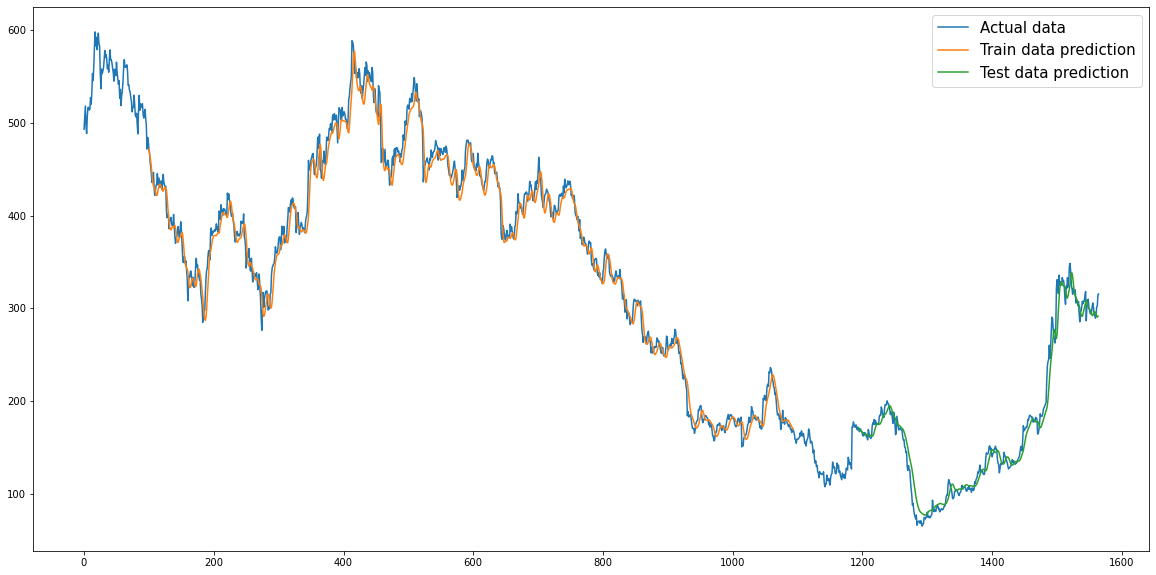

In [193]:
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(labels=['Actual data','Train data prediction','Test data prediction'],fontsize=15)
plt.show()

### Predicting the close price for next 30 days

In [171]:
len(test_data)

470

In [172]:
x_input=test_data[370:].reshape(1,-1)
x_input.shape

(1, 100)

In [173]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [174]:
temp_input

[0.21085348770977871,
 0.2131994323569971,
 0.22004960790908665,
 0.21845435409417027,
 0.21629609647353717,
 0.18626800498914156,
 0.18701869582144362,
 0.1949949076219862,
 0.2076630087169656,
 0.2271812853640345,
 0.22173867660027605,
 0.22305239987531442,
 0.2224893960695977,
 0.22746278726689287,
 0.23647122043961546,
 0.2400370448485796,
 0.2441659017002801,
 0.24669953337408382,
 0.2493269799241606,
 0.2915539835740919,
 0.32374036131614026,
 0.33274879448886285,
 0.3374406837832997,
 0.365967336329052,
 0.3390359089611964,
 0.36287070084953155,
 0.3933679812633708,
 0.42283306894204975,
 0.42048712429483137,
 0.40134419306391345,
 0.37948000040664576,
 0.3781662484945877,
 0.3704715958709427,
 0.4021887560465277,
 0.48176318702536824,
 0.4986539884853408,
 0.48955171179932555,
 0.4703149656921346,
 0.5079439521979414,
 0.48748726905496553,
 0.494712790023206,
 0.4873934541786925,
 0.48814414501099457,
 0.5030643758769193,
 0.495275851102962,
 0.4970587346704245,
 0.485235196558

In [175]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.4426341]
101
1 day input [0.21319943 0.22004961 0.21845435 0.2162961  0.186268   0.1870187
 0.19499491 0.20766301 0.22718129 0.22173868 0.2230524  0.2224894
 0.22746279 0.23647122 0.24003704 0.2441659  0.24669953 0.24932698
 0.29155398 0.32374036 0.33274879 0.33744068 0.36596734 0.33903591
 0.3628707  0.39336798 0.42283307 0.42048712 0.40134419 0.37948
 0.37816625 0.3704716  0.40218876 0.48176319 0.49865399 0.48955171
 0.47031497 0.50794395 0.48748727 0.49471279 0.48739345 0.48814415
 0.50306438 0.49527585 0.49705873 0.4852352  0.46271413 0.44891996
 0.4855167  0.48110631 0.502689   0.48354613 0.49358673 0.52633614
 0.53149721 0.51404341 0.48767496 0.48035562 0.46900127 0.48073099
 0.4734116  0.47528836 0.47791586 0.45135972 0.45361185 0.45727155
 0.44619864 0.45436254 0.43005859 0.41335542 0.43371823 0.43493811
 0.4438527  0.45501942 0.44995215 0.45501942 0.45511323 0.46665533
 0.47463154 0.41523217 0.44582333 0.44704321 0.45924212 0.44310201
 0.43681486 0.43024622 0.42921403 0.431

9 day output [[0.4346068]]
10 day input [0.22173868 0.2230524  0.2224894  0.22746279 0.23647122 0.24003704
 0.2441659  0.24669953 0.24932698 0.29155398 0.32374036 0.33274879
 0.33744068 0.36596734 0.33903591 0.3628707  0.39336798 0.42283307
 0.42048712 0.40134419 0.37948    0.37816625 0.3704716  0.40218876
 0.48176319 0.49865399 0.48955171 0.47031497 0.50794395 0.48748727
 0.49471279 0.48739345 0.48814415 0.50306438 0.49527585 0.49705873
 0.4852352  0.46271413 0.44891996 0.4855167  0.48110631 0.502689
 0.48354613 0.49358673 0.52633614 0.53149721 0.51404341 0.48767496
 0.48035562 0.46900127 0.48073099 0.4734116  0.47528836 0.47791586
 0.45135972 0.45361185 0.45727155 0.44619864 0.45436254 0.43005859
 0.41335542 0.43371823 0.43493811 0.4438527  0.45501942 0.44995215
 0.45501942 0.45511323 0.46665533 0.47463154 0.41523217 0.44582333
 0.44704321 0.45924212 0.44310201 0.43681486 0.43024622 0.42921403
 0.43184147 0.44328969 0.45154741 0.44404039 0.42893253 0.42733727
 0.42067481 0.42452214 0

19 day output [[0.4104862]]
20 day input [0.32374036 0.33274879 0.33744068 0.36596734 0.33903591 0.3628707
 0.39336798 0.42283307 0.42048712 0.40134419 0.37948    0.37816625
 0.3704716  0.40218876 0.48176319 0.49865399 0.48955171 0.47031497
 0.50794395 0.48748727 0.49471279 0.48739345 0.48814415 0.50306438
 0.49527585 0.49705873 0.4852352  0.46271413 0.44891996 0.4855167
 0.48110631 0.502689   0.48354613 0.49358673 0.52633614 0.53149721
 0.51404341 0.48767496 0.48035562 0.46900127 0.48073099 0.4734116
 0.47528836 0.47791586 0.45135972 0.45361185 0.45727155 0.44619864
 0.45436254 0.43005859 0.41335542 0.43371823 0.43493811 0.4438527
 0.45501942 0.44995215 0.45501942 0.45511323 0.46665533 0.47463154
 0.41523217 0.44582333 0.44704321 0.45924212 0.44310201 0.43681486
 0.43024622 0.42921403 0.43184147 0.44328969 0.45154741 0.44404039
 0.42893253 0.42733727 0.42067481 0.42452214 0.44282051 0.44563564
 0.4683444  0.46965809 0.44263411 0.44864064 0.45073655 0.4502587
 0.44839501 0.44589171 0.4

27 day output [[0.3946612]]
28 day input [0.42048712 0.40134419 0.37948    0.37816625 0.3704716  0.40218876
 0.48176319 0.49865399 0.48955171 0.47031497 0.50794395 0.48748727
 0.49471279 0.48739345 0.48814415 0.50306438 0.49527585 0.49705873
 0.4852352  0.46271413 0.44891996 0.4855167  0.48110631 0.502689
 0.48354613 0.49358673 0.52633614 0.53149721 0.51404341 0.48767496
 0.48035562 0.46900127 0.48073099 0.4734116  0.47528836 0.47791586
 0.45135972 0.45361185 0.45727155 0.44619864 0.45436254 0.43005859
 0.41335542 0.43371823 0.43493811 0.4438527  0.45501942 0.44995215
 0.45501942 0.45511323 0.46665533 0.47463154 0.41523217 0.44582333
 0.44704321 0.45924212 0.44310201 0.43681486 0.43024622 0.42921403
 0.43184147 0.44328969 0.45154741 0.44404039 0.42893253 0.42733727
 0.42067481 0.42452214 0.44282051 0.44563564 0.4683444  0.46965809
 0.44263411 0.44864064 0.45073655 0.4502587  0.44839501 0.44589171
 0.44313267 0.44028938 0.43743527 0.43460679 0.43182811 0.42911848
 0.42649186 0.42395639 

In [176]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [177]:
len(df2)

1565

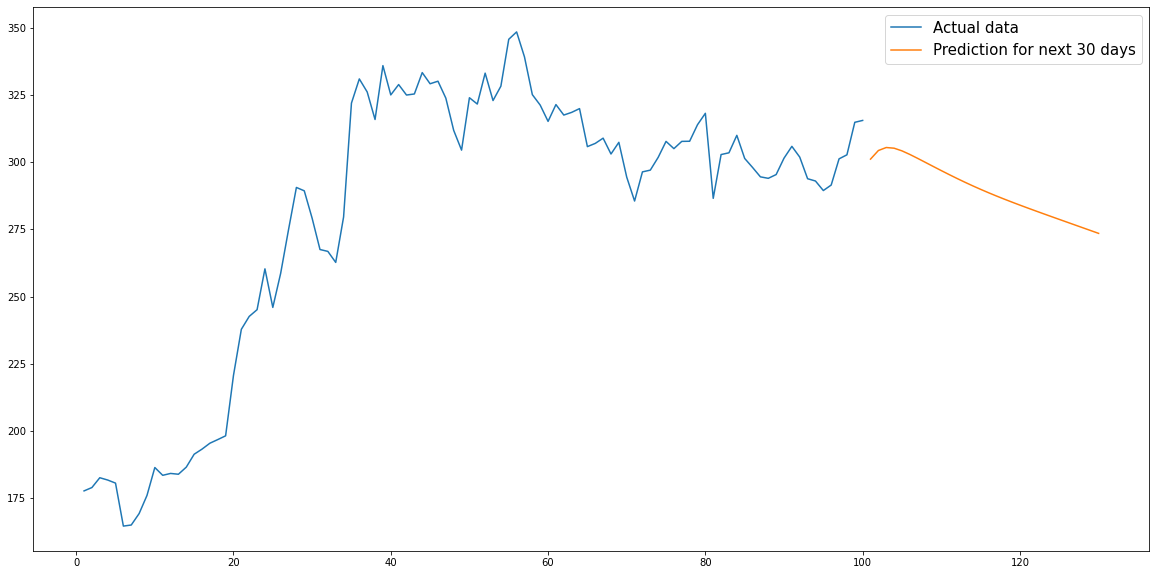

In [194]:
plt.plot(day_new,scaler.inverse_transform(df2[1465:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(labels = ['Actual data','Prediction for next 30 days'], fontsize=15)

### Predicted price for next 30 days

In [180]:
scaler.inverse_transform(lst_output)

array([[301.15067956],
       [304.35117007],
       [305.46794191],
       [305.21332676],
       [304.22028957],
       [302.8864422 ],
       [301.4163311 ],
       [299.90132809],
       [298.38056075],
       [296.87344995],
       [295.39287413],
       [293.94909158],
       [292.549534  ],
       [291.19855244],
       [289.89719494],
       [288.64400058],
       [287.43517411],
       [286.26561815],
       [285.12963187],
       [284.02116512],
       [282.93445356],
       [281.86430453],
       [280.80608116],
       [279.75609936],
       [278.71126257],
       [277.66945881],
       [276.62898895],
       [275.58905899],
       [274.54927196],
       [273.5095802 ]])

### Combing the actual and predicted graph together

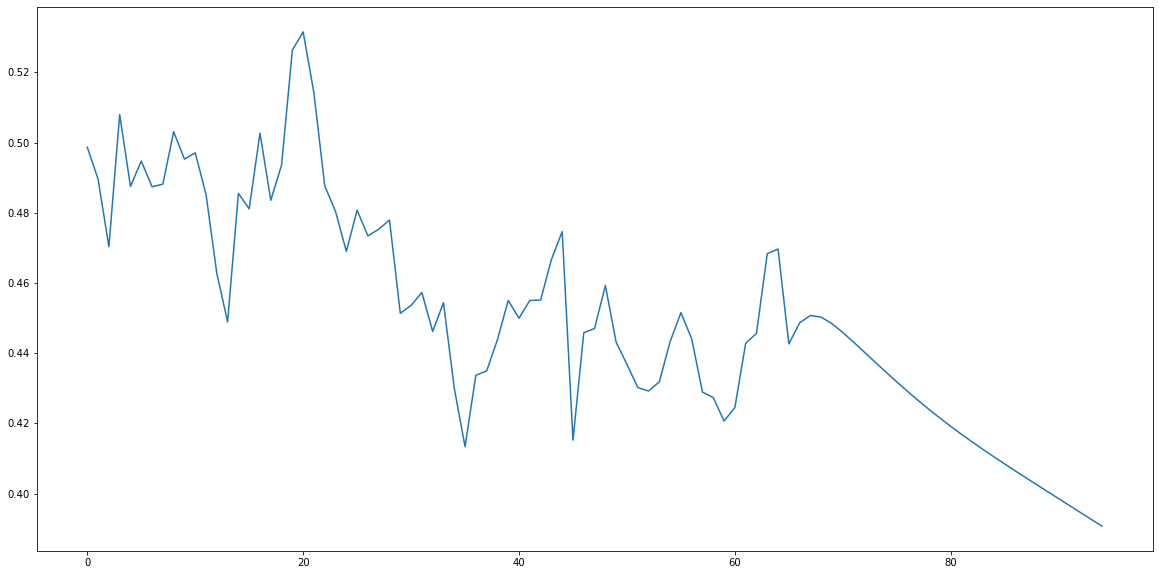

In [181]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

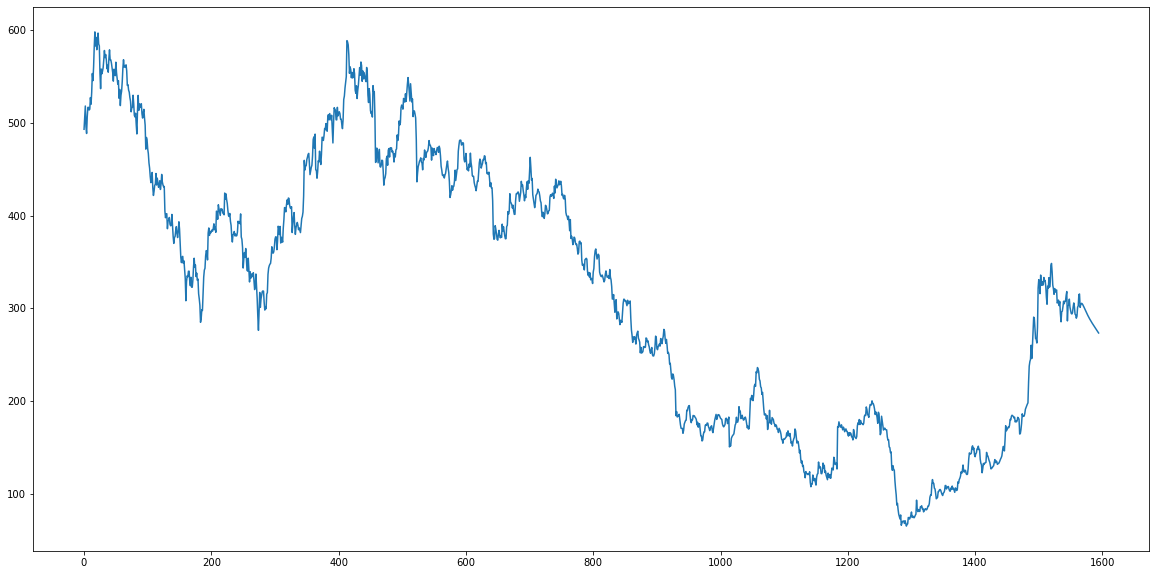

In [182]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)